# Plot 3D trajectory

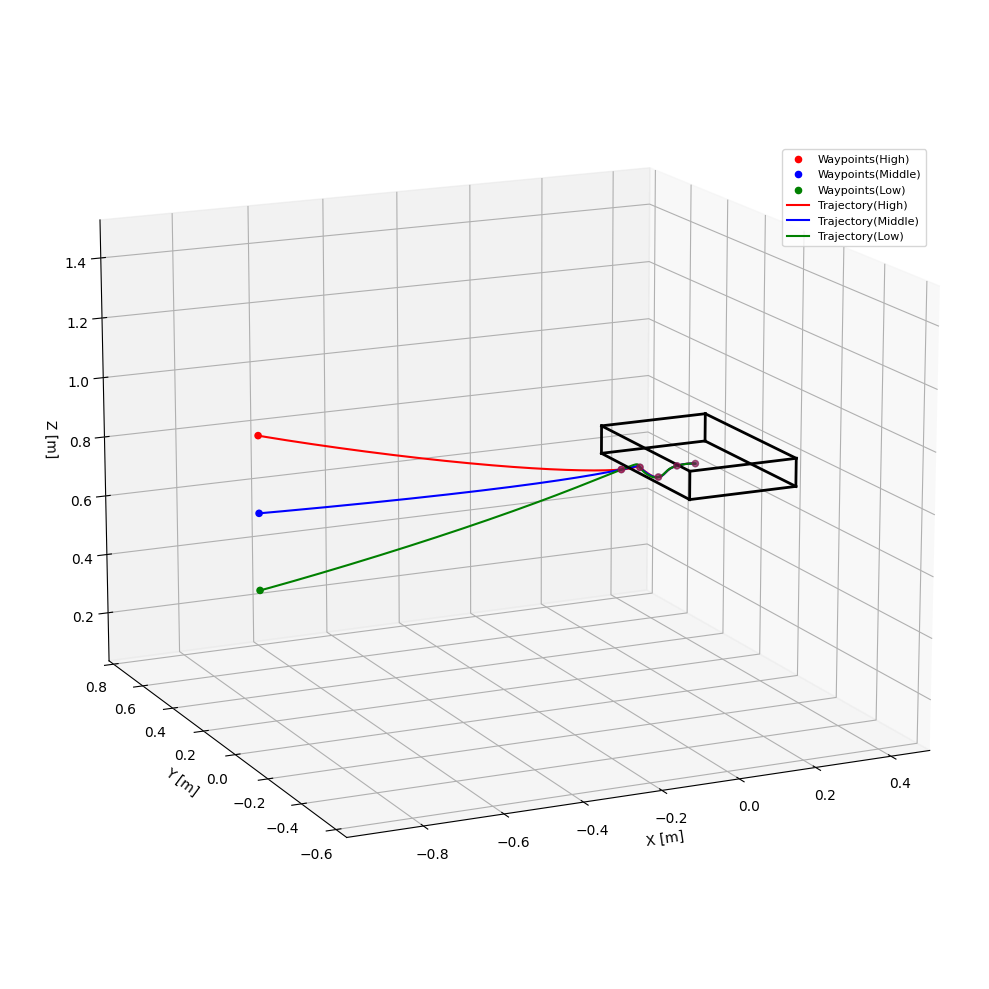

Plot saved to pdf_trajectory_3d.pdf


In [14]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import argparse

import uav_trajectory
import pandas as pd


def load_filtered_data(file_path):
    """
    Load and filter the trajectory data from a CSV file.
    Args:
        file_path (str): Path to the CSV file containing trajectory data.
    Returns:
        pd.DataFrame: Filtered trajectory data excluding the last row and with x > -0.877.
    """
    df = pd.read_csv(file_path, header=None, skiprows=1)

    filtered_data = df.iloc[:-1]  # Skip the last row. It records the time when the trajectory starts to execute.
    # last_time = df.iloc[-1, 0]
    # filtered_data = filtered_data[filtered_data[0] > last_time]

    x_start = -0.877
    filtered_data = filtered_data[filtered_data[1] > x_start]

    return filtered_data

def plot_box():
    # 绘制立方体方框
    x_min, x_max = 0.155-0.032, 0.377+0.032
    y_min, y_max = -0.122-0.032, 0.293+0.032
    z_min, z_max = 0.741, 0.834

    # 8个顶点
    corners = np.array([
        [x_min, y_min, z_min],
        [x_max, y_min, z_min],
        [x_max, y_max, z_min],
        [x_min, y_max, z_min],
        [x_min, y_min, z_max],
        [x_max, y_min, z_max],
        [x_max, y_max, z_max],
        [x_min, y_max, z_max],
    ])

    # 12条棱，每条棱由两个顶点组成
    edges = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # 底面
        [4, 5], [5, 6], [6, 7], [7, 4],  # 顶面
        [0, 4], [1, 5], [2, 6], [3, 7],  # 侧面
    ]

    for edge in edges:
        ax_3d.plot(
            [corners[edge[0], 0], corners[edge[1], 0]],
            [corners[edge[0], 1], corners[edge[1], 1]],
            [corners[edge[0], 2], corners[edge[1], 2]],
            c="k", linewidth=2, label=None
        )


def plot_commanded_trajectory(ax_3d, trajectory_path, linestyle='-', color='b', label="ref"):
    """
    在指定的3D坐标轴上绘制指令轨迹
    Args:
        ax_3d: matplotlib 3D轴对象
        trajectory_path (str): 轨迹CSV文件路径
        linestyle (str): 线型
        color (str): 颜色
        label (str): 图例标签
    """
    traj = uav_trajectory.Trajectory()
    traj.loadcsv(trajectory_path)
    ts = np.arange(0, traj.duration, 0.01)
    evals = np.empty((len(ts), 15))
    for t, i in zip(ts, range(0, len(ts))):
        e = traj.eval(t)
        evals[i, 0:3] = e.pos
        evals[i, 3:6] = e.vel
        evals[i, 6:9] = e.acc
        evals[i, 9:12] = e.omega
        evals[i, 12] = e.yaw
        evals[i, 13] = e.roll
        evals[i, 14] = e.pitch
    ax_3d.plot(evals[:, 0], evals[:, 1], evals[:, 2], linestyle=linestyle, color=color, label=label)


if __name__ == "__main__":

    fig_3d = plt.figure(figsize=(10, 10))
    ax_3d = fig_3d.add_subplot(111, projection="3d")


    # Plot waypoints
    waypoints_path = "./data/waypoints/final_high.csv"
    waypoints = np.loadtxt(waypoints_path, delimiter=",")
    ax_3d.scatter(waypoints[:, 0], waypoints[:, 1], waypoints[:, 2], c="red", marker="o", s=20, label="Waypoints(High)")

    waypoints_path = "./data/waypoints/final_middle.csv"
    waypoints = np.loadtxt(waypoints_path, delimiter=",")
    ax_3d.scatter(waypoints[:, 0], waypoints[:, 1], waypoints[:, 2], c="blue", marker="o", s=20, label="Waypoints(Middle)")

    waypoints_path = "./data/waypoints/final_low.csv"
    waypoints = np.loadtxt(waypoints_path, delimiter=",")
    ax_3d.scatter(waypoints[:, 0], waypoints[:, 1], waypoints[:, 2], c="green", marker="o", s=20, label="Waypoints(Low)")


    # Plot commanded trajectory
    trajectory_path = "./data/trajectories/final_high_traj.csv"
    plot_commanded_trajectory(ax_3d, trajectory_path, linestyle='-', color='red', label="Trajectory(High)")

    trajectory_path = "./data/trajectories/final_middle_traj.csv"
    plot_commanded_trajectory(ax_3d, trajectory_path, linestyle='-', color='blue', label="Trajectory(Middle)")

    trajectory_path = "./data/trajectories/final_low_traj.csv"
    plot_commanded_trajectory(ax_3d, trajectory_path, linestyle='-', color='green', label="Trajectory(Low)")


    # Plot real trajectory   
    # real_data_path = "./data/varying_height/middle/20250604_16_30_31.csv"
    # real_data = load_filtered_data(real_data_path)
    # real_data_np = real_data.to_numpy()  # 转为 numpy 数组
    # ax_3d.plot(real_data_np[:, 1], real_data_np[:, 2], real_data_np[:, 3], label="real")
    # ax_3d.plot(real_data[:, 1], real_data[:, 2], real_data[:, 3], label="real")  # 绘制轨迹

    plot_box()

    ax_3d.set_xlabel("X [m]")  # 设置 X 轴标签
    ax_3d.set_ylabel("Y [m]")  # 设置 Y 轴标签
    ax_3d.set_zlabel("Z [m]")  # 设置 Z 轴标签
    # ax_3d.set_title("3D Trajectory")  # 设置标题
    # ax_3d.text2D(0.5, 0.85, "3D Trajectory", transform=ax_3d.transAxes, fontsize=10, ha='center')
    # ax_3d.legend()
    ax_3d.legend(loc='lower right', bbox_to_anchor=(0.95, 0.75), fontsize=8)

    # 设置所有轴的比例相同
    x_limits = ax_3d.get_xlim()
    y_limits = ax_3d.get_ylim()
    z_limits = ax_3d.get_zlim()

    max_range = max(
        x_limits[1] - x_limits[0],
        y_limits[1] - y_limits[0],
        z_limits[1] - z_limits[0],
    ) / 2.0

    x_mid = (x_limits[0] + x_limits[1]) / 2.0
    y_mid = (y_limits[0] + y_limits[1]) / 2.0
    z_mid = (z_limits[0] + z_limits[1]) / 2.0

    ax_3d.set_xlim([x_mid - max_range, x_mid + max_range])
    ax_3d.set_ylim([y_mid - max_range, y_mid + max_range])
    ax_3d.set_zlim([z_mid - max_range, z_mid + max_range])
    # ax_3d.set_zlim([z_mid - 0.45 * (z_limits[1] - z_limits[0]), z_mid + 0.45 * (z_limits[1] - z_limits[0])])
    ax_3d.view_init(15, -115)


    plt.tight_layout()
    dpi = 300
    output_file = "pdf_trajectory_3d.pdf"
    plt.savefig(output_file, format='pdf', dpi=dpi, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Plot saved to {output_file}")

# Controller Z

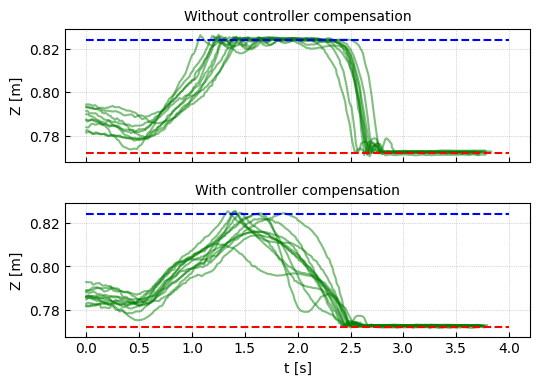

Plot saved to pdf_controller.pdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import uav_trajectory

def load_filtered_data(file_path, x_start=-0.870):
    ''' Load and filter data from a CSV file.'''
    df = pd.read_csv(file_path, header=None, skiprows=1)
    t_start = df[0].iloc[-1]
    df = df.iloc[:-1]
    df = df[df[0] > t_start]
    df = df[df[1] > x_start]
    return df


def plot_actual_trajectory(ax: plt.Axes, csv_file: str, x_start: float = -0.877):
    '''
    Plot the actual trajectory from a CSV file on the given axes.
    Args:
        ax (plt.Axes): The axes to plot on.
        csv_file (str): Path to the actual trajectory CSV file.
        x_start (float): Value threshold for filtering the trajectory data.
    '''
    for i, csv_file in enumerate(glob.glob(csv_file)):
        df = load_filtered_data(csv_file, x_start)
        if i == 0:
            ax.plot(df[0] - df[0].iloc[0], df[3], color='g', alpha=0.5, label='Actual trajectory', linewidth= 1.5)
        else:
            ax.plot(df[0] - df[0].iloc[0], df[3], color='g', alpha=0.5, label='_nolegend_',linewidth= 1.5)


def plot_safe_barrier(ax: plt.Axes, style = 'r--', line_width = 1):
    x_min, x_max = 0.155 - 0.032 + 0.01, 0.377 + 0.032 - 0.01
    z_min, z_max = 0.741+0.033, 0.834-0.011
    ax.plot([x_min, x_max], [z_min, z_min], style, linewidth = line_width, label = 'Safe boundary')  # Bottom
    ax.plot([x_min, x_max], [z_max, z_max], style, linewidth = line_width)  # Top
    # ax.plot([x_min, x_min], [z_min, z_max], style, linewidth = line_width)  # Left
    # ax.plot([x_max, x_max], [z_min, z_max], style, linewidth = line_width)  # Right


if __name__ == '__main__':
    x_start = -0.90
    # Changed to 3 rows, 1 column, and adjusted figsize
    fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True, sharey=True) # sharex=True ensures x-axes are linked

    labels = ['BPBC', 'BPPC']
    data_paths = [f'./data/ablation/{lbl}/*.csv' for lbl in labels]
    # Removed img_paths as it wasn't used
    

        # if j == 2: # Only set xlabel for the bottom-most subplot
        #     ax.set_xlabel("t [s]")


    # 第一个 subplot（BPBC）
    label = labels[0]
    act_traj_path = data_paths[0]
    ax = axs[0]

    # ax.set_ylim(0.7, 0.85)
    # ax.set_aspect('equal')
    ax.grid(linestyle=':', linewidth=0.5)
    ax.set_ylabel('Z [m]')
    ax.set_title('Without controller compensation', fontsize=10)
    # plot_hangar_box(ax)
    # plot_safe_barrier(ax)
    plot_actual_trajectory(ax, act_traj_path, x_start=0.0)
    x = list(range(5))  # 或 x = [0, 1, 2, 3]
    ax.plot(x, [0.741 + 0.031] * len(x), 'r--', label='Upper bound')
    ax.plot(x, [0.834 - 0.01] * len(x), 'b--', label='Lower bound')

    # 第二个 subplot（BPPC）
    label = labels[1]
    act_traj_path = data_paths[1]
    ax = axs[1]

    # ax.set_ylim(0.7, 0.85)
    # ax.set_aspect('equal')
    ax.grid(linestyle=':', linewidth=0.5)
    ax.set_ylabel('Z [m]')
    ax.set_title('With controller compensation', fontsize=10)
    # plot_hangar_box(ax)
    # plot_safe_barrier(ax)
    plot_actual_trajectory(ax, act_traj_path, x_start=0.0)
    x = list(range(5))  # 或 x = [0, 1, 2, 3]
    ax.plot(x, [0.741 + 0.031] * len(x), 'r--', label='Upper bound')
    ax.plot(x, [0.834 - 0.01] * len(x), 'b--', label='Lower bound')
    ax.set_xlabel("t [s]")

    # Collect legend handles and labels from all subplots
    handles, labels = [], []
    for ax in axs:
        for h, l in zip(*ax.get_legend_handles_labels()):
            if l not in labels:
                handles.append(h)
                labels.append(l)

    for ax in axs:
        ax.tick_params(axis='both', direction='in')



    # plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust rect to make space for the legend
    plt.subplots_adjust(hspace=0.3) # Reduce horizontal space between subplots

    # Save as PDF
    output_file = 'pdf_controller.pdf'
    dpi = 300
    plt.savefig(output_file, format='pdf', dpi=dpi, bbox_inches='tight')
    plt.show()
    print(f"Plot saved to {output_file}")

# Controller roll and pitch

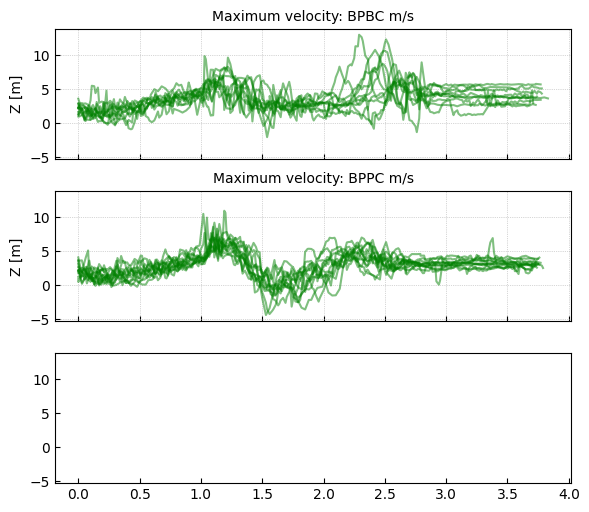

Plot saved to pdf_controller_attitude.pdf


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import uav_trajectory
from scipy.spatial.transform import Rotation as R

# def load_filtered_data(file_path, x_start=-0.870):
#     ''' Load and filter data from a CSV file.'''
#     df = pd.read_csv(file_path, header=None, skiprows=1)
#     t_start = df[0].iloc[-1]
#     df = df.iloc[:-1]
#     df = df[df[0] > t_start]
#     df = df[df[1] > x_start]
#     return df
def load_filtered_data(file_path, x_start=-0.870):
    '''Load, filter, and convert quaternion data to euler angles.'''
    df = pd.read_csv(file_path, header=None, skiprows=1)
    t_start = df[0].iloc[-1]
    df = df.iloc[:-1]
    df = df[df[0] > t_start]
    df = df[df[1] > x_start]

    # Convert quaternion to euler angles (columns 3,4,5,6 → qx, qy, qz, qw)
    quaternions = df[[4, 5, 6, 7]].to_numpy()
    r = R.from_quat(quaternions)
    euler = r.as_euler('xyz', degrees=True)
    df['roll'] = euler[:, 0]
    df['pitch'] = euler[:, 1]
    df['yaw'] = euler[:, 2]

    return df


def plot_actual_trajectory(ax: plt.Axes, csv_file: str, x_start: float = -0.877):
    '''
    Plot the actual trajectory from a CSV file on the given axes.
    Args:
        ax (plt.Axes): The axes to plot on.
        csv_file (str): Path to the actual trajectory CSV file.
        x_start (float): Value threshold for filtering the trajectory data.
    '''
    for i, csv_file in enumerate(glob.glob(csv_file)):
        df = load_filtered_data(csv_file, x_start)
        # if i == 0:
        #     ax.plot(df[0] - df[0].iloc[0], df['yaw'], color='g', alpha=0.5, label='Actual trajectory', linewidth= 1.5)
        # else:
        #     ax.plot(df[0] - df[0].iloc[0], df['yaw'], color='g', alpha=0.5, label='_nolegend_',linewidth= 1.5)

        if i == 0:
            ax.plot(df[0] - df[0].iloc[0], df['pitch'], color='g', alpha=0.5, label='Actual trajectory', linewidth= 1.5)
        else:
            ax.plot(df[0] - df[0].iloc[0], df['pitch'], color='g', alpha=0.5, label='_nolegend_',linewidth= 1.5)

        # if i == 0:
        #     ax.plot(df[0] - df[0].iloc[0], df['roll'], color='g', alpha=0.5, label='Actual trajectory', linewidth= 1.5)
        # else:
        #     ax.plot(df[0] - df[0].iloc[0], df['roll'], color='g', alpha=0.5, label='_nolegend_',linewidth= 1.5)


if __name__ == '__main__':
    x_start = -0.90
    # Changed to 3 rows, 1 column, and adjusted figsize
    fig, axs = plt.subplots(3, 1, figsize=(6, 5.5), sharex=True, sharey=True) # sharex=True ensures x-axes are linked

    labels = ['BPBC', 'BPPC']
    data_paths = [f'./data/ablation/{lbl}/*.csv' for lbl in labels]
    # Removed img_paths as it wasn't used
    

    for j in range(2):  # Loop through each row (now each subplot)
        label = labels[j]
        # img_path = img_paths[j] # Removed
        act_traj_path = data_paths[j]

        ax = axs[j] # Directly access the subplot for the current row

        # ax.set_ylim(0.7, 0.85)
        # ax.set_aspect('equal')
        ax.grid(linestyle=':', linewidth=0.5)
        ax.set_ylabel('Z [m]')
        ax.set_title(f'Maximum velocity: {label.replace("_", ".")} m/s', fontsize=10) # Added subplot titles

        # plot_hangar_box(ax)
        # plot_safe_barrier(ax)
        plot_actual_trajectory(ax, act_traj_path, x_start=0.0)


        if j == 2: # Only set xlabel for the bottom-most subplot
            ax.set_xlabel("X [m]")

    # Collect legend handles and labels from all subplots
    handles, labels = [], []
    for ax in axs:
        for h, l in zip(*ax.get_legend_handles_labels()):
            if l not in labels:
                handles.append(h)
                labels.append(l)

    for ax in axs:
        ax.tick_params(axis='both', direction='in')



    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust rect to make space for the legend
    plt.subplots_adjust(hspace=0.25) # Reduce horizontal space between subplots

    output_file = 'pdf_controller_attitude.pdf'
    dpi = 300
    plt.savefig(output_file, format='pdf', dpi=dpi, bbox_inches='tight')
    plt.show()
    print(f"Plot saved to {output_file}")

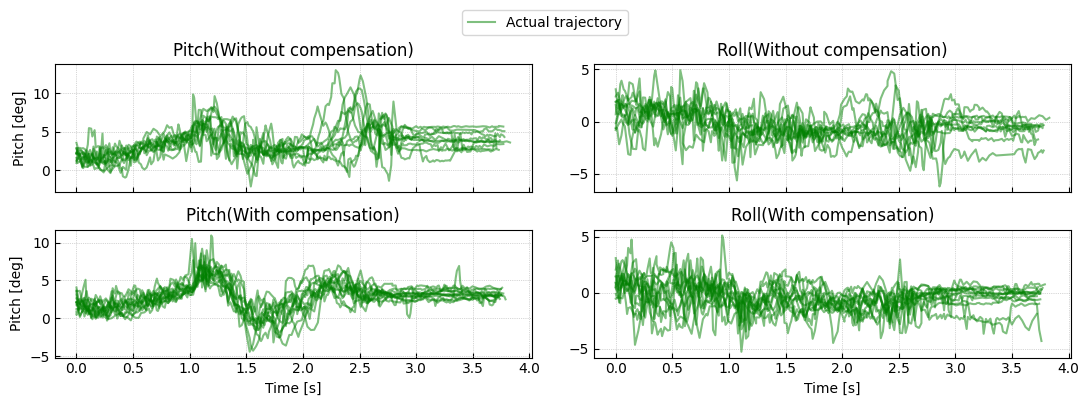

Plot saved to pdf_pitch_roll_2x2.pdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.spatial.transform import Rotation as R

# def load_filtered_data(file_path, x_start=-0.870):
#     '''Load, filter, and convert quaternion data to euler angles.'''
#     df = pd.read_csv(file_path, header=None, skiprows=1)
#     t_start = df[0].iloc[-1]
#     df = df.iloc[:-1]
#     df = df[df[0] > t_start]
#     df = df[df[1] > x_start]

#     quaternions = df[[4, 5, 6, 7]].to_numpy()
#     r = R.from_quat(quaternions)
#     euler = r.as_euler('xyz', degrees=True)
#     df['roll'] = euler[:, 0]
#     df['pitch'] = euler[:, 1]
#     df['yaw'] = euler[:, 2]

#     return df


def load_filtered_data(file_path, x_start=-0.870):
    '''Load, filter, and convert quaternion data to euler angles.'''
    df = pd.read_csv(file_path, header=None, skiprows=1)
    t_start = df[0].iloc[-1]
    df = df.iloc[:-1]
    df = df[df[0] > t_start]
    df = df[df[1] > x_start]

    # Convert quaternion to euler angles (columns 3,4,5,6 → qx, qy, qz, qw)
    quaternions = df[[4, 5, 6, 7]].to_numpy()
    r = R.from_quat(quaternions)
    euler = r.as_euler('xyz', degrees=True)
    df['roll'] = euler[:, 0]
    df['pitch'] = euler[:, 1]
    df['yaw'] = euler[:, 2]

    return df

def plot_attitude(ax: plt.Axes, csv_path: str, field: str, x_start: float = -0.877):
    files = sorted(glob.glob(csv_path))
    for i, file in enumerate(files):
        df = load_filtered_data(file, x_start)
        time = df[0] - df[0].iloc[0]
        label = "Actual trajectory" if i == 0 else "_nolegend_"
        ax.plot(time, df[field], color='g', alpha=0.5, label=label, linewidth=1.5)

# === Main Plot ===
if __name__ == "__main__":
    fig, axs = plt.subplots(2, 2, figsize=(11, 4), sharex=True)

    # BPBC - pitch
    ax = axs[0, 0]
    plot_attitude(ax, './data/ablation/BPBC/*.csv', 'pitch',x_start = 0.0)
    ax.set_ylabel('Pitch [deg]')
    ax.set_title('Pitch(Without compensation)')
    ax.grid(linestyle=':', linewidth=0.5)
    ax.

    # BPBC - roll
    ax = axs[0, 1]
    plot_attitude(ax, './data/ablation/BPBC/*.csv', 'roll',x_start = 0.0)
    ax.set_title('Roll(Without compensation)')
    ax.grid(linestyle=':', linewidth=0.5)

    # BPPC - pitch
    ax = axs[1, 0]
    plot_attitude(ax, './data/ablation/BPPC/*.csv', 'pitch',x_start = 0.0)
    ax.set_ylabel('Pitch [deg]')
    ax.set_xlabel('Time [s]')
    ax.set_title('Pitch(With compensation)')
    ax.grid(linestyle=':', linewidth=0.5)

    # BPPC - roll
    ax = axs[1, 1]
    plot_attitude(ax, './data/ablation/BPPC/*.csv', 'roll',x_start = 0.0)
    ax.set_title('Roll(With compensation)')
    ax.set_xlabel('Time [s]')
    ax.grid(linestyle=':', linewidth=0.5)

    # legend only once
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

    for ax_row in axs:
        for ax in ax_row:
            ax.tick_params(axis='both', direction='in')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    output_file = 'pdf_pitch_roll_2x2.pdf'
    dpi = 300
    plt.savefig(output_file, format='pdf', dpi=dpi, bbox_inches='tight')
    plt.show()
    print(f"Plot saved to {output_file}")


## Roll

AttributeError: 'Axes' object has no attribute 'rcParams'

findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif'

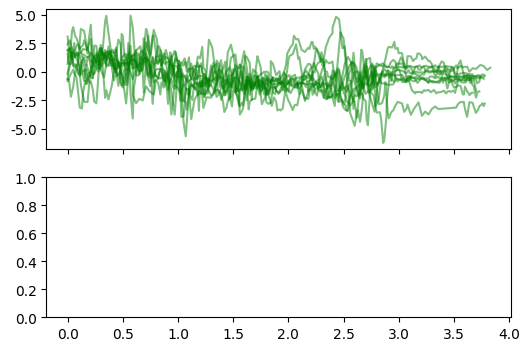

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.spatial.transform import Rotation as R

def load_filtered_data(file_path, x_start=-0.870):
    '''Load, filter, and convert quaternion data to euler angles.'''
    df = pd.read_csv(file_path, header=None, skiprows=1)
    t_start = df[0].iloc[-1]
    df = df.iloc[:-1]
    df = df[df[0] > t_start]
    df = df[df[1] > x_start]

    quaternions = df[[4, 5, 6, 7]].to_numpy()
    r = R.from_quat(quaternions)
    euler = r.as_euler('xyz', degrees=True)
    df['roll'] = euler[:, 0]
    df['pitch'] = euler[:, 1]
    df['yaw'] = euler[:, 2]

    return df

def plot_attitude(ax: plt.Axes, csv_path: str, field: str, x_start: float = -0.877):
    files = sorted(glob.glob(csv_path))
    for i, file in enumerate(files):
        df = load_filtered_data(file, x_start)
        time = df[0] - df[0].iloc[0]
        label = "Actual trajectory" if i == 0 else "_nolegend_"
        ax.plot(time, df[field], color='g', alpha=0.5, label=label, linewidth=1.5)


fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)


# BPBC
ax = axs[0]
plot_attitude(ax, './data/ablation/BPBC/*.csv', 'roll', x_start=0.0)
# ax.set_title('Roll (Without compensation)')
ax.rcParams['font.sans-serif'] = ['STHeiti']
ax.rcParams['axes.unicode_minus'] = False
ax.set_title('横滚角 (有补偿)')

ax.set_ylabel('Roll [deg]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim(-6,6)

# BPPC
ax = axs[1]
plot_attitude(ax, './data/ablation/BPPC/*.csv', 'roll', x_start=0.0)
ax.set_title('Roll (With compensation)')
ax.set_ylabel('Roll [deg]')
ax.set_xlabel('Time [s]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim(-6,6)

# legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('pdf_roll_2x1.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Pitch

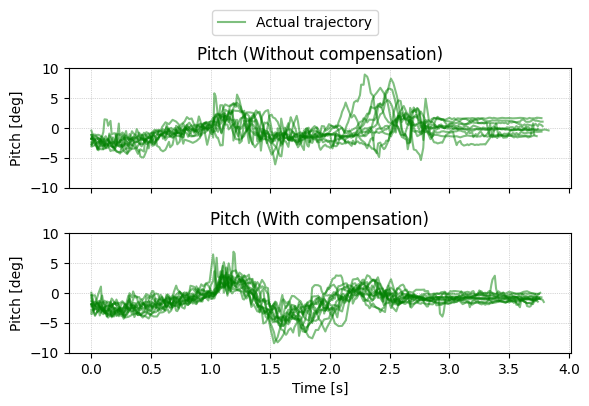

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.spatial.transform import Rotation as R

def load_filtered_data(file_path, x_start=-0.870):
    '''Load, filter, and convert quaternion data to euler angles.'''
    df = pd.read_csv(file_path, header=None, skiprows=1)
    t_start = df[0].iloc[-1]
    df = df.iloc[:-1]
    df = df[df[0] > t_start]
    df = df[df[1] > x_start]

    quaternions = df[[4, 5, 6, 7]].to_numpy()
    r = R.from_quat(quaternions)
    euler = r.as_euler('xyz', degrees=True)
    df['roll'] = euler[:, 0]
    df['pitch'] = euler[:, 1]
    df['yaw'] = euler[:, 2]

    return df

def plot_attitude(ax: plt.Axes, csv_path: str, field: str, x_start: float = -0.877):
    files = sorted(glob.glob(csv_path))
    for i, file in enumerate(files):
        df = load_filtered_data(file, x_start)
        time = df[0] - df[0].iloc[0]
        label = "Actual trajectory" if i == 0 else "_nolegend_"
        ax.plot(time, df[field]-4, color='g', alpha=0.5, label=label, linewidth=1.5)



fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# BPBC
ax = axs[0]
plot_attitude(ax, './data/ablation/BPBC/*.csv', 'pitch', x_start=0.0)
ax.set_title('Pitch (Without compensation)')
ax.set_ylabel('Pitch [deg]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim(-10,10)

# BPPC
ax = axs[1]
plot_attitude(ax, './data/ablation/BPPC/*.csv', 'pitch', x_start=0.0)
ax.set_title('Pitch (With compensation)')
ax.set_ylabel('Pitch [deg]')
ax.set_xlabel('Time [s]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim(-10,10)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('pdf_pitch_2x1.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Yaw

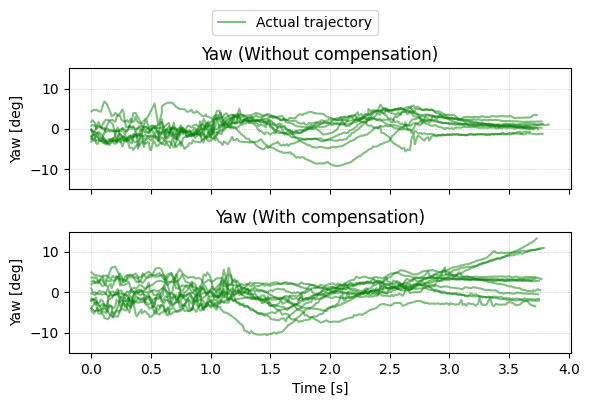

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.spatial.transform import Rotation as R

def load_filtered_data(file_path, x_start=-0.870):
    '''Load, filter, and convert quaternion data to euler angles.'''
    df = pd.read_csv(file_path, header=None, skiprows=1)
    t_start = df[0].iloc[-1]
    df = df.iloc[:-1]
    df = df[df[0] > t_start]
    df = df[df[1] > x_start]

    quaternions = df[[4, 5, 6, 7]].to_numpy()
    r = R.from_quat(quaternions)
    euler = r.as_euler('xyz', degrees=True)
    df['roll'] = euler[:, 0]
    df['pitch'] = euler[:, 1]
    df['yaw'] = euler[:, 2]

    return df

def plot_attitude(ax: plt.Axes, csv_path: str, field: str, x_start: float = -0.877):
    files = sorted(glob.glob(csv_path))
    for i, file in enumerate(files):
        df = load_filtered_data(file, x_start)
        time = df[0] - df[0].iloc[0]
        label = "Actual trajectory" if i == 0 else "_nolegend_"
        ax.plot(time, df[field], color='g', alpha=0.5, label=label, linewidth=1.5)



fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# BPBC
ax = axs[0]
plot_attitude(ax, './data/ablation/BPBC/*.csv', 'yaw', x_start=0.0)
ax.set_title('Yaw (Without compensation)')
ax.set_ylabel('Yaw [deg]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim(-15,15)

# BPPC
ax = axs[1]
plot_attitude(ax, './data/ablation/BPPC/*.csv', 'yaw', x_start=0.0)
ax.set_title('Yaw (With compensation)')
ax.set_ylabel('Yaw [deg]')
ax.set_xlabel('Time [s]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim(-15,15)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('pdf_yaw_2x1.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [3]:
import matplotlib.font_manager as fm
for f in fm.fontManager.ttflist:
    if 'Hei' in f.name or 'Song' in f.name or 'Kai' in f.name:
        print(f.name)


AR PL UKai CN
